In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

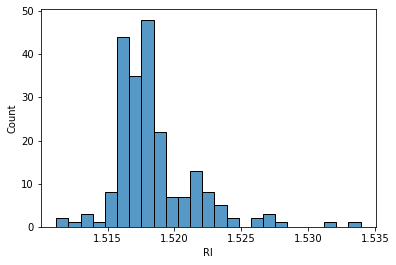

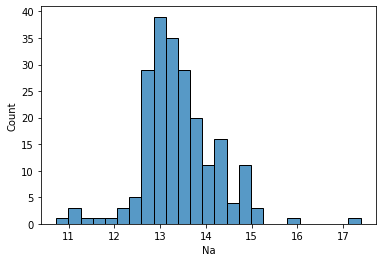

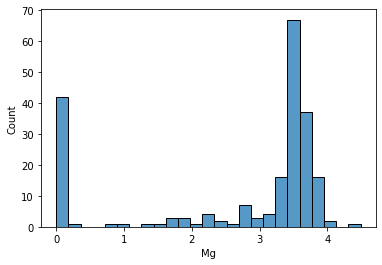

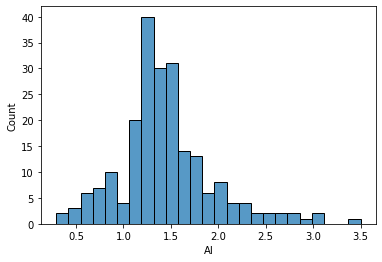

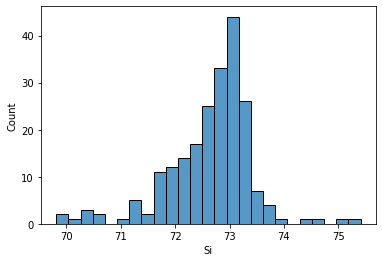

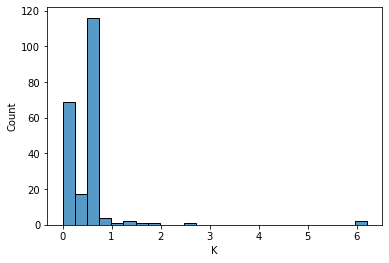

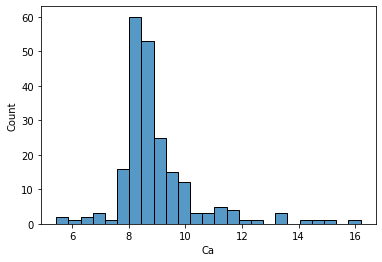

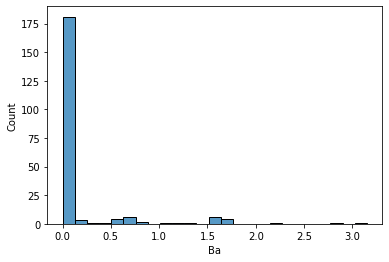

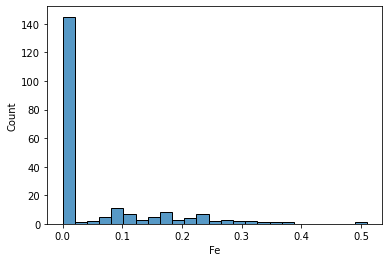

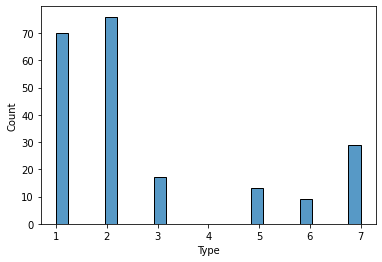

<Figure size 432x288 with 0 Axes>

In [12]:
for i in df.columns:
    sns.histplot(x = (df[i]), bins=25)
    plt.figure()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
x = df.drop('Type', axis = 1)

In [17]:
y = df.Type

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, test_size= 0.3)

In [19]:
model1 = LogisticRegression()

In [22]:
model1.fit(x_train, y_train)

C:\Users\91988\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print(model1.score(x_train, y_train))
model1.score(x_test, y_test)

0.6845637583892618


0.5538461538461539

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [36]:
pipe2 = make_pipeline(MinMaxScaler(), LogisticRegression())

In [38]:
pipe2.fit(x_train, y_train)
print(pipe2.score(x_test, y_test))
pipe2.score(x_train, y_train)


0.5230769230769231


0.6174496644295302

In [26]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())


In [27]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [28]:
pipe.score(x_test, y_test)

0.5692307692307692

In [43]:
from sklearn.linear_model import RidgeClassifier

In [52]:
pipe3 = make_pipeline(StandardScaler(), RidgeClassifier())

In [53]:
pipe3.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier())])

In [54]:
pipe3.score(x_train, y_train)

0.6644295302013423

In [55]:
pipe3.score(x_test, y_test)

0.5846153846153846

In [140]:
from sklearn.ensemble import RandomForestClassifier
pipe4 = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators= 10, max_depth=10))


In [137]:
pipe4.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [138]:
pipe4.score(x_train, y_train)

1.0

In [139]:
pipe4.score(x_test, y_test)

0.676923076923077